In [178]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [179]:
directory = "/Users/dfischer/Documents/WheeCAIR/data/mack/2019"
mack = pd.DataFrame([])
for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith("_MACK.txt"):
                    newdf = pd.read_csv(file, header = None, sep = '\t')
                    mack = mack.append(newdf)

mack.columns = ['ID', 'Timestamp', 'Temp_C', 'RH_percent', 'P_hPa', 'VOC_arb', 'PM25_ugm3']
                    
i = 0
dropindex = [i]
for val in mack['ID']:
    if "NULL" in val:
        dropindex = dropindex + [i]
    i = i+1
mack = mack.drop(mack.index[dropindex])
                    

mack['Timestamp'] = mack['Timestamp'].apply(datetime.fromisoformat)
mack = mack.sort_values(by = ['Timestamp'])
mack.set_index('Timestamp', inplace = True)
mack.head()

,ID,Temp_C,RH_percent,P_hPa,VOC_arb,PM25_ugm3
Timestamp,,,,,,
2019-10-21 00:00:43,MACK,18.62,73.58,930.71,96.79,7.73
2019-10-21 00:01:16,MACK,18.62,73.59,930.67,96.96,4.00
2019-10-21 00:01:48,MACK,18.62,73.58,930.69,96.91,3.00
2019-10-21 00:02:21,MACK,18.62,73.60,930.67,96.57,3.93
2019-10-21 00:02:54,MACK,18.61,73.62,930.67,96.63,3.80


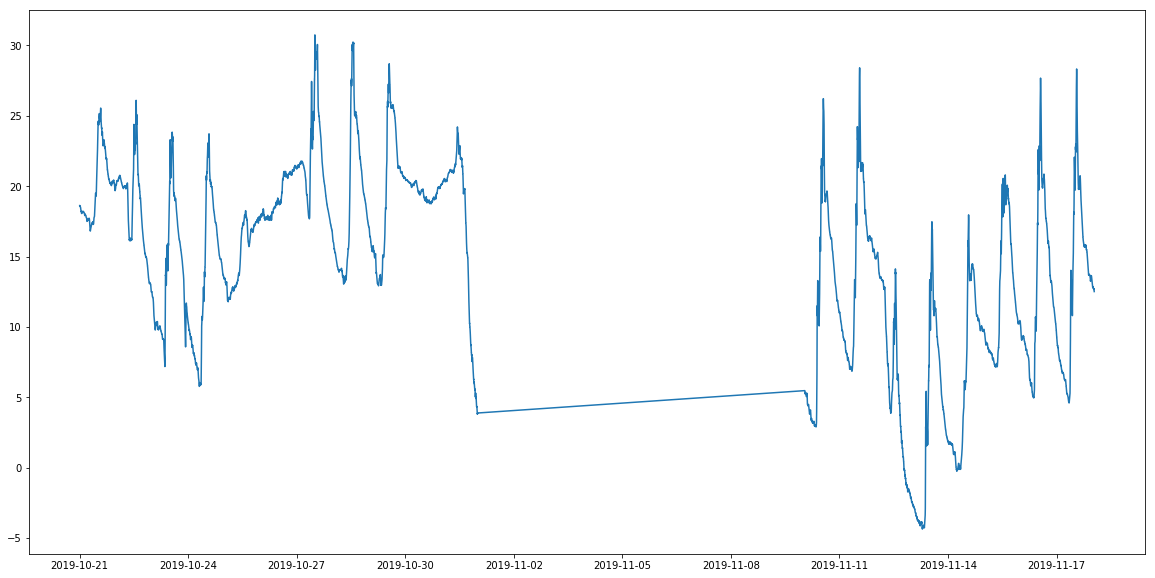

In [180]:
plt.figure(figsize=(20, 10))
plt.plot(mack['Temp_C'])
plt.show()

In [181]:
mack_10min = mack.resample('10min').mean()
mack_10min.head()

,Temp_C,RH_percent,P_hPa,VOC_arb,PM25_ugm3
Timestamp,,,,,
2019-10-21 00:00:00,18.608889,73.662778,930.685556,96.492778,4.685000
2019-10-21 00:10:00,18.595385,73.453077,930.668462,97.450000,8.528462
2019-10-21 00:20:00,18.547857,73.392143,930.654286,98.227857,14.227857
2019-10-21 00:30:00,18.470000,73.177778,930.631111,99.366111,13.151667
2019-10-21 00:40:00,18.380588,73.357647,930.707647,100.857647,21.685294


In [183]:
mack_10min.to_csv('20191021_MACK_10Min.TXT')

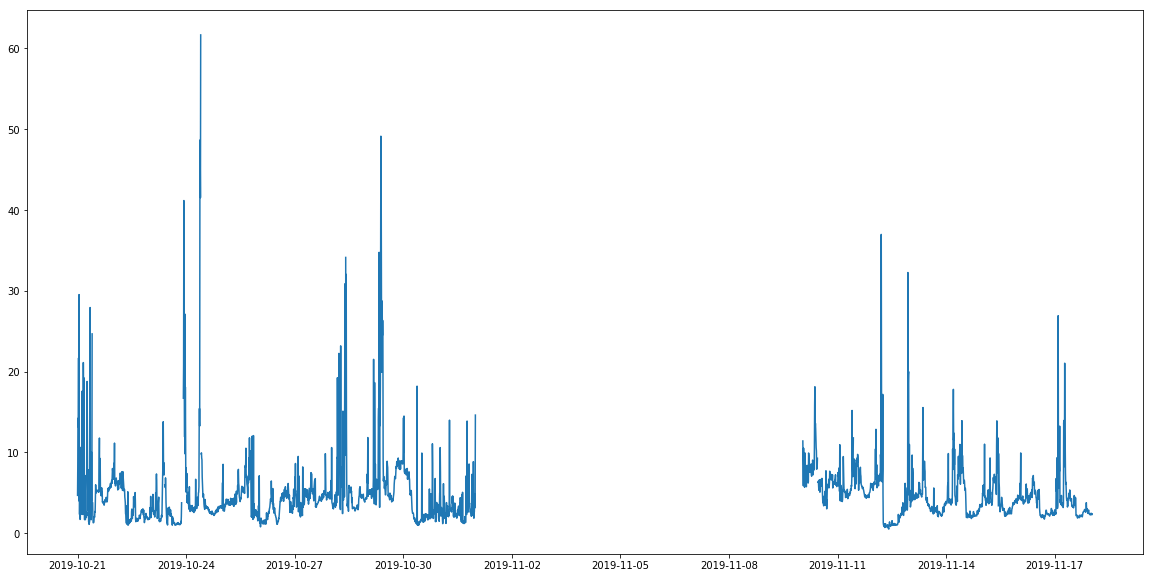

In [185]:
plt.figure(figsize=(20, 10))
plt.plot(mack_10min['PM25_ugm3'])
plt.show()